# Creation of vTEC maps

We will use detrended TEC data to create maps using scipy linear baricentric interpolation. I wanted to use Sibson natural neighbor interpolation, taken from https://github.com/innolitics/natural-neighbor-interpolation, but when installing the python library, errors prevent installation and have not been solved so far.

## Simple example

We will start with a simple 2D function (proposed by scipy.interpolate.griddata documentation):
\begin{equation}
f(x, y) = x(1-x)\cos(4\pi x)\sin^2(4\pi y^2)
\end{equation}

In [1]:
from scipy.interpolate import griddata
import numpy as np
import matplotlib.pyplot as plt
import naturalneighbor as nn

In [2]:
def f(x, y):
    return x*(1-x)*np.cos(4*np.pi*x)*np.sin(4*np.pi*y**2)**2

In [9]:
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:100j]
grid_ranges = [[0, 1, 100j], [0, 1, 100j]]

The arguments in np.mgrid are the following:
The first two numbers describe the range of data, the third the number of elements (rows/colums) of each axis, introducing an imaginary number implies that we allow non integer numbers. The first set of numbers apply for x-axis and the second for the y-axis

In [10]:
rng = np.random.default_rng()
points = rng.random((1000, 2))
values = f(points[:, 0], points[:, 1])

In [12]:
grid_z0 = griddata(points, values, (grid_x, grid_y), method="nearest")
grid_z1 = griddata(points, values, (grid_x, grid_y), method="linear")
grid_z2 = griddata(points, values, (grid_x, grid_y), method="cubic")
#grid_zn = nn.griddata(points, values, grid_ranges)

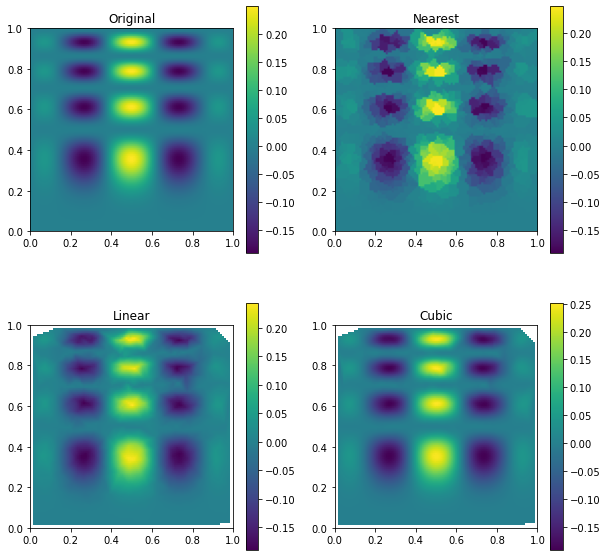

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
im1=ax1.imshow(f(grid_x, grid_y).T, extent=(0,1,0,1), origin="lower")
ax1.set_title("Original")
im2=ax2.imshow(grid_z0.T, extent=(0,1,0,1), origin="lower")
ax2.set_title("Nearest")
im3=ax3.imshow(grid_z1.T, extent=(0,1,0,1), origin="lower")
ax3.set_title("Linear")
im4=ax4.imshow(grid_z2.T, extent=(0,1,0,1), origin="lower")
ax4.set_title("Cubic")
fig.set_size_inches(10, 10)
plt.colorbar(im1, ax=ax1)
plt.colorbar(im2, ax=ax2)
plt.colorbar(im3, ax=ax3)
plt.colorbar(im4, ax=ax4)

## Venezolan meteor

Now we will try with the venezolan meteor data, since is already detrended and we found evidence of ionospheric perturbations.

In [13]:
import pandas as pd

### Read data of the 5 sets of stations

In [14]:
set1 = pd.read_csv("./data/2019-06-22/set1/2019-06-22_21.43_detrended-sTEC.csv")
set2 = pd.read_csv("./data/2019-06-22/set2/2019-06-22_21.43_detrended-sTEC.csv")
set3 = pd.read_csv("./data/2019-06-22/set3/2019-06-22_21.43_detrended-sTEC.csv")
set4 = pd.read_csv("./data/2019-06-22/set4/2019-06-22_21.43_detrended-sTEC.csv")
set5 = pd.read_csv("./data/2019-06-22/set5/2019-06-22_21.43_detrended-sTEC.csv")

### Extract and merge relevant data

In [15]:
lat1 = np.array(set1["Latitude"])
lat2 = np.array(set2["Latitude"])
lat3 = np.array(set3["Latitude"])
lat4 = np.array(set4["Latitude"])
lat5 = np.array(set5["Latitude"])
latitude = np.concatenate((lat1, lat2, lat3, lat4, lat5))

In [16]:
lon1 = np.array(set1["Longitude"])
lon2 = np.array(set2["Longitude"])
lon3 = np.array(set3["Longitude"])
lon4 = np.array(set4["Longitude"])
lon5 = np.array(set5["Longitude"])
longitude = np.concatenate((lon1, lon2, lon3, lon4, lon5))

In [17]:
tec1 = np.array(set1["sTEC"])
tec2 = np.array(set2["sTEC"])
tec3 = np.array(set3["sTEC"])
tec4 = np.array(set4["sTEC"])
tec5 = np.array(set5["sTEC"])
TEC = np.concatenate((tec1, tec2, tec3, tec4, tec5))

### Create the map

Set map boundaries and create grid

In [18]:
xmin, ymin = np.min(longitude), np.min(latitude)
xmax, ymax = np.max(longitude), np.max(latitude) 
res = 0.1
nx = int((xmax-xmin)/res)*1j
ny = int((ymax-ymin)/res)*1j

In [19]:
grid_x, grid_y = np.mgrid[xmin:xmax:nx, ymin:ymax:ny]

Create coordinates array

In [20]:
coordinates = []
for lat, lon in zip(latitude, longitude):
    coord_pair = [lon, lat]
    coordinates.append(coord_pair)

Plot the data !!!

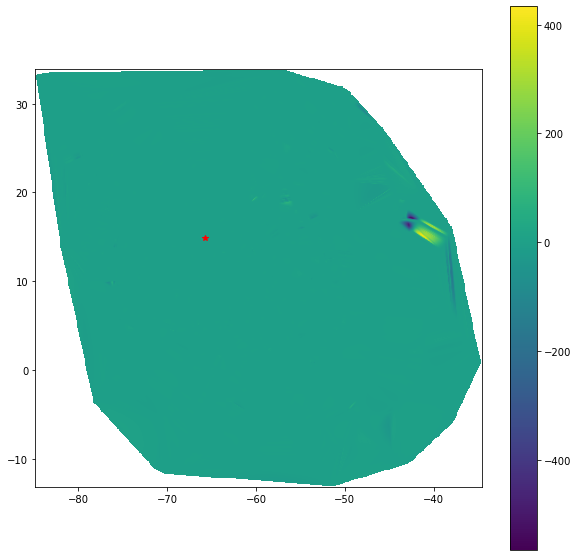

In [21]:
meteor_pos_x, meteor_pos_y = -65.8, 14.9
grid0 = griddata(np.array(coordinates), TEC, (grid_x, grid_y), method="cubic")
plt.imshow(grid0.T, extent=(xmin, xmax, ymin, ymax), origin="lower")
plt.plot(meteor_pos_x, meteor_pos_y, "r*")
plt.colorbar()
plt.gcf().set_size_inches(10, 10)

This map give us a hint that there is something at one of our sets, but is not clear which one. Let's try them individually

### set 1

In [22]:
xmin, ymin = np.min(lon1), np.min(lat1)
xmax, ymax = np.max(lon1), np.max(lat1) 
res = 0.1
nx = int((xmax-xmin)/res)*1j
ny = int((ymax-ymin)/res)*1j

In [23]:
grid_x, grid_y = np.mgrid[xmin:xmax:nx, ymin:ymax:ny]

In [24]:
coordinates = []
for lat, lon in zip(lat1, lon1):
    coord_pair = [lon, lat]
    coordinates.append(coord_pair)

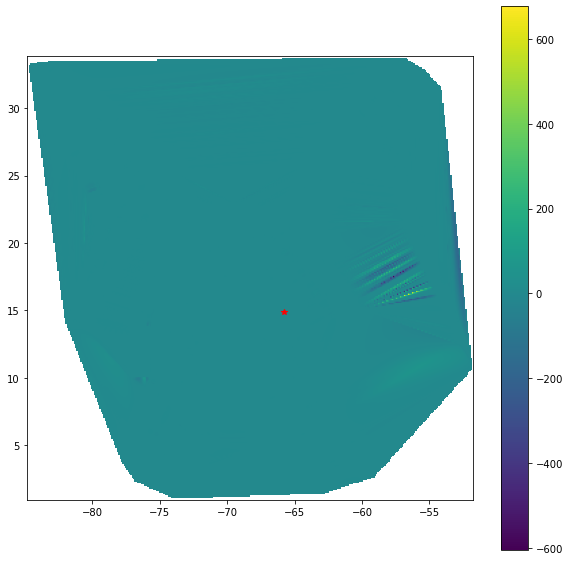

In [25]:
meteor_pos_x, meteor_pos_y = -65.8, 14.9
grid1 = griddata(np.array(coordinates), tec1, (grid_x, grid_y), method="cubic")
plt.imshow(grid1.T, extent=(xmin, xmax, ymin, ymax), origin="lower")
plt.plot(meteor_pos_x, meteor_pos_y, "r*")
plt.colorbar()
plt.gcf().set_size_inches(10, 10)

### Set 2

In [26]:
xmin, ymin = np.min(lon2), np.min(lat2)
xmax, ymax = np.max(lon2), np.max(lat2) 
res = 0.1
nx = int((xmax-xmin)/res)*1j
ny = int((ymax-ymin)/res)*1j

In [27]:
grid_x, grid_y = np.mgrid[xmin:xmax:nx, ymin:ymax:ny]

In [28]:
coordinates = []
for lat, lon in zip(lat2, lon2):
    coord_pair = [lon, lat]
    coordinates.append(coord_pair)

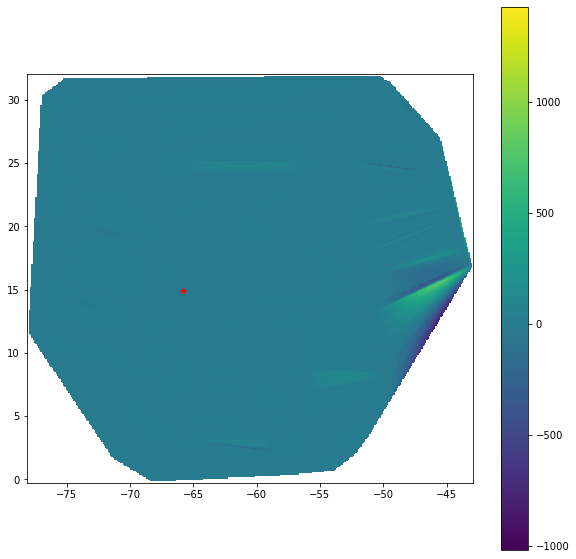

In [29]:
meteor_pos_x, meteor_pos_y = -65.8, 14.9
grid2 = griddata(np.array(coordinates), tec2, (grid_x, grid_y), method="cubic")
plt.imshow(grid2.T, extent=(xmin, xmax, ymin, ymax), origin="lower")
plt.plot(meteor_pos_x, meteor_pos_y, "r*")
plt.colorbar()
plt.gcf().set_size_inches(10, 10)

### Set 3

In [30]:
xmin, ymin = np.min(lon3), np.min(lat3)
xmax, ymax = np.max(lon3), np.max(lat3) 
res = 0.1
nx = int((xmax-xmin)/res)*1j
ny = int((ymax-ymin)/res)*1j

In [31]:
grid_x, grid_y = np.mgrid[xmin:xmax:nx, ymin:ymax:ny]

In [32]:
coordinates = []
for lat, lon in zip(lat3, lon3):
    coord_pair = [lon, lat]
    coordinates.append(coord_pair)

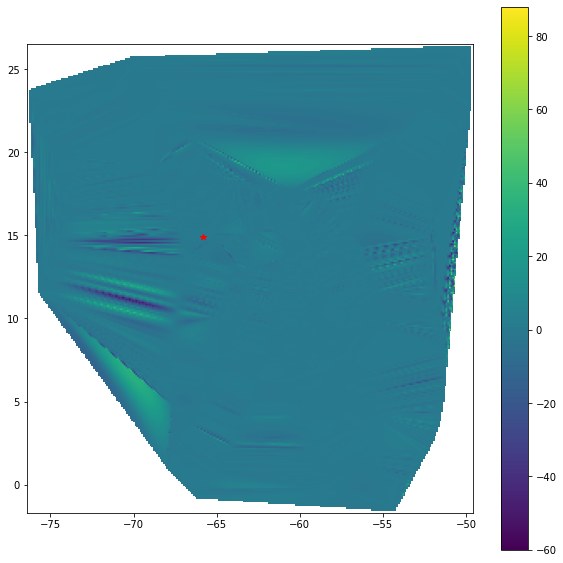

In [33]:
meteor_pos_x, meteor_pos_y = -65.8, 14.9
grid3 = griddata(np.array(coordinates), tec3, (grid_x, grid_y), method="cubic")
plt.imshow(grid3.T, extent=(xmin, xmax, ymin, ymax), origin="lower")
plt.plot(meteor_pos_x, meteor_pos_y, "r*")
plt.colorbar()
plt.gcf().set_size_inches(10, 10)

### Set 4

In [34]:
xmin, ymin = np.min(lon4), np.min(lat4)
xmax, ymax = np.max(lon4), np.max(lat4) 
res = 0.1
nx = int((xmax-xmin)/res)*1j
ny = int((ymax-ymin)/res)*1j

In [35]:
grid_x, grid_y = np.mgrid[xmin:xmax:nx, ymin:ymax:ny]

In [36]:
coordinates = []
for lat, lon in zip(lat4, lon4):
    coord_pair = [lon, lat]
    coordinates.append(coord_pair)

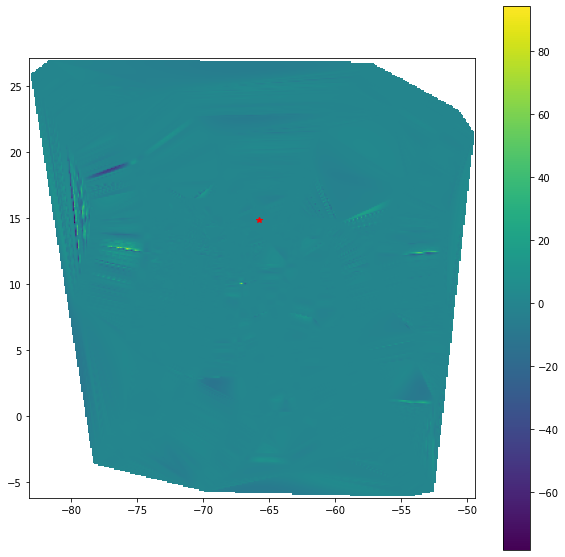

In [37]:
meteor_pos_x, meteor_pos_y = -65.8, 14.9
grid4 = griddata(np.array(coordinates), tec4, (grid_x, grid_y), method="cubic")
plt.imshow(grid4.T, extent=(xmin, xmax, ymin, ymax), origin="lower")
plt.plot(meteor_pos_x, meteor_pos_y, "r*")
plt.colorbar()
plt.gcf().set_size_inches(10, 10)

### Set 5

In [38]:
xmin, ymin = np.min(lon5), np.min(lat5)
xmax, ymax = np.max(lon5), np.max(lat5) 
res = 0.1
nx = int((xmax-xmin)/res)*1j
ny = int((ymax-ymin)/res)*1j

In [39]:
grid_x, grid_y = np.mgrid[xmin:xmax:nx, ymin:ymax:ny]

In [40]:
coordinates = []
for lat, lon in zip(lat5, lon5):
    coord_pair = [lon, lat]
    coordinates.append(coord_pair)

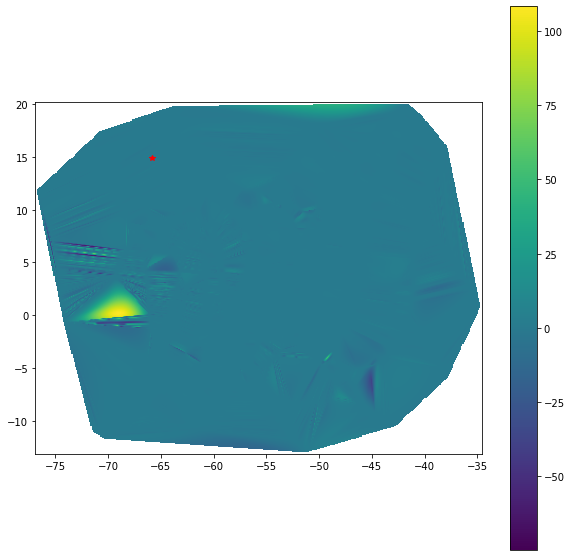

In [41]:
meteor_pos_x, meteor_pos_y = -65.8, 14.9
grid5 = griddata(np.array(coordinates), tec5, (grid_x, grid_y), method="cubic")
plt.imshow(grid5.T, extent=(xmin, xmax, ymin, ymax), origin="lower")
plt.plot(meteor_pos_x, meteor_pos_y, "r*")
plt.colorbar()
plt.gcf().set_size_inches(10, 10)

Some features, like the one located at $lat\simeq 15-20~deg$ and $lon\simeq-60^\circ$ appears consistently in all images. With a bit of luck, this is a real perturbation and not some kind of noise, let's check coherency.

# Wavelets coherency

Now it is time to do wavelet analysis using some tools from https://github.com/chris-torrence/wavelets. This provide python functions that allow us to convert finite, discrete time series into the frequency domain (much like Fourier transforms), but wavelets only exist in a limited time interval and tend to zero outside of such interval. For more details check for example 
[Torrence & Compo 1998](https://doi.org/10.1175/1520-0477(1998)079%3C0061:APGTWA%3E2.0.CO;2)

From the wavelet transform, denoted as $W_n(s)$, we may obtain the wavelet coherence spectrum as follows:
Given two time series X and Y, and their respective wavelets transforms $W_n^X$ and $W_n^Y$, the coherence function $R_n^2(s)$ is defined as:
\begin{equation}
R_n^2(s) = \frac{\left|\langle s^{-1}W_n^{XY}(s)\rangle\right|^2}{\langle s^{-1}|W_n^X(s)|^2\rangle\langle s^{-1}|W_n^Y(s)|^2\rangle}
\end{equation}
Where $W_n^{XY}(s) = W_n^X(s){W_n^Y}^*(s)$ and the brackets indicate smoothing both in time and scale.

Now we will show the definition of coherence by [Yang et al. 2011](https://doi.org/10.1109/IGARSS.2011.6049396):

\begin{equation}
R_{1,2}^2(t,f) = \frac{\left|W_{12}(t,f)\right|^2}{\left|W_{1}(t,f)\right|^2\left|W_{2}(t,f)\right|^2}
\end{equation}
Where $W_{12}(t,f) = W_{1}(t,f)W_{2}^*(t,f)$

## How to smooth wavelet transforms

### Smoothing in time

\begin{equation}
\bar{W_n}^2(s) = \frac{1}{n_a}\sum^{n_2}_{n=n_1}\left|W_n(s)\right|^2
\end{equation}
Where $n$ is the midpoint of the $[n_1, n_2]$ interval, and $n_a = n_2 - n_1 +1$ is the number of points averaged. $n_a$ is usually lower than the total points in the time series, but is possible to get an average over all data points.

## Wavelet analysis without smoothing

We may stick to the wavelet coherency definition of [Yang et al. 2011](https://doi.org/10.1109/IGARSS.2011.6049396), which does not specify that smoothing is necessary, only calcutation of absolute values.

For that job we have a python scipt which does the wavelet analysis and check coherency for every pair of stations using time series with same PRN number. Does the same for the previous day of event as contrast. wavelet_power.py